In [57]:
import pandas as pd;
import numpy as np;

covid = pd.read_csv('./models/google_new.csv');
#testing w/o 0-cases days
#covid = covid[covid['total_cases'] > 0]

In [58]:
#List of all countries in dataset
countries = covid['country'].unique()

#dict with populations to fill
population = {'Argentina' : 44490000, 'Australia' : 24990000, 'Brazil' : 209500000, 'Canada' : 37590000, 'Germany' : 83020000, 'Spain' : 46940000, 
              'France' : 66990000, 'United Kingdom' : 66650000, 'Indonesia' : 267700000, 'India' : 1353000000, 'Italy' : 60360000, 'Japan' : 126500000, 
              'South Korea' : 51640000, 'Mexico' : 126200000, 'Saudi Arabia' : 33700000, 'Sweden' : 10230000, 'Turkey' : 82000000, 'US' : 328200000, 
              'South Africa' : 57780000}

#passed days column
covid['date']= pd.to_datetime(covid.date)
for country in countries:
    covid.loc[covid['country'] == country, 'population'] = population[country];
    covid.loc[:, 'cases_per_thousand'] = covid['total_cases']/(covid['population']/1000000.0);
    country_rows = covid[covid['country'] == country]
    covid.loc[covid['country'] == country, 'passed_days'] = (country_rows['date'] - country_rows.iloc[0]['date']).dt.days
    
covid.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities,population,cases_per_thousand,passed_days
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0,44490000.0,0.0,0.0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0,44490000.0,0.0,1.0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0,44490000.0,0.0,2.0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0,44490000.0,0.0,3.0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0,44490000.0,0.0,4.0


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt;
import seaborn as sb;

# train and test sets
from sklearn.model_selection import train_test_split

# Define country to use by excluding it from training/testing dataset
testing = covid.drop(covid.loc[covid.country=='Brazil'].index);
testing = testing.drop(columns=['country', 'fatalities', 'date', 'iso', 'population', 'total_cases'])
testing.reset_index(drop=True, inplace=True)

train , test = train_test_split(testing, test_size=0.2, random_state=4)
x_train = train.drop('cases_per_thousand', axis=1)
y_train = train['cases_per_thousand']

x_test = test.drop('cases_per_thousand', axis = 1)
y_test = test['cases_per_thousand']

RMSE value for k=  1 is: 183.84323529113954
RMSE value for k=  2 is: 171.99085881656217
RMSE value for k=  3 is: 173.46347336388234
RMSE value for k=  4 is: 187.8073033878365
RMSE value for k=  5 is: 198.929657704723
RMSE value for k=  6 is: 206.43002226527918
RMSE value for k=  7 is: 217.94409142370029
RMSE value for k=  8 is: 222.99483250577657
RMSE value for k=  9 is: 235.52036081370284
RMSE value for k=  10 is: 242.8190864777782
RMSE value for k=  11 is: 250.78209934047263
RMSE value for k=  12 is: 257.3711244261396
RMSE value for k=  13 is: 261.26791032363184
RMSE value for k=  14 is: 265.1733255003998
RMSE value for k=  15 is: 263.7753092437058
RMSE value for k=  16 is: 266.9527893853038
RMSE value for k=  17 is: 259.94544622422745
RMSE value for k=  18 is: 261.67693752496046
RMSE value for k=  19 is: 264.29429082748675
RMSE value for k=  20 is: 264.00811926875093


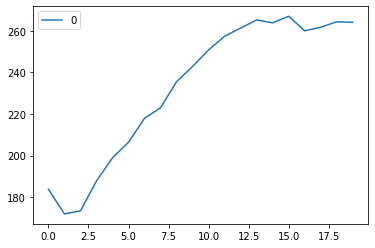

In [60]:
# best K value

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

#Root Mean Squared Error 
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val)
curve.plot()

In [61]:
# this is another (better) way of getting the right k value
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13]}
knn = neighbors.KNeighborsRegressor()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = GridSearchCV(knn, params, cv=5, scoring='r2')
model.fit(x_train,y_train)
print(model.score(x_test, y_test))
print('Best parameters: {}'.format(model.best_params_))

0.8457658744962259
Best parameters: {'n_neighbors': 2}


In [63]:
ct = covid.loc[covid['country'] == 'Brazil']
ct= ct.drop(columns=['country', 'fatalities', 'date', 'iso', 'population', 'total_cases'])
ct.reset_index(drop=True, inplace=True)

# preserve solution
solution = ct
ct = ct.drop(['cases_per_thousand'], axis=1)

predict = model.predict(ct)
ct['cases_per_thousand'] = predict
ct

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,passed_days,cases_per_thousand
0,6.953,32.326,0.778,4.322,2.113,-2.543,0.0,0.141016
1,-6.522,68.676,8.125,-13.948,-26.987,-45.315,1.0,86.796591
2,-28.524,50.735,9.672,-31.478,-34.936,-60.556,2.0,70.332356
3,-10.696,-8.178,5.739,-18.266,-17.438,-18.111,3.0,3.780219
4,1.512,-10.672,0.871,-8.467,1.192,10.004,4.0,0.000000
5,3.196,-16.695,1.056,-5.184,1.772,13.097,5.0,1.880752
6,4.746,-22.699,3.063,-2.599,-2.258,5.059,6.0,1.142837
7,2.943,-34.474,4.526,-9.188,-9.702,-1.409,7.0,1.308300
8,0.620,-25.477,-0.194,-6.325,5.517,19.505,8.0,1.880752
9,1.876,-20.685,-0.536,-4.694,6.061,14.943,9.0,1.880752
